# <font color='blue'>Topic Modeling 
</font> <font color='red'>NLP project, LDA & Naive byse</font> 
* **Part 1 - Data Preprocessing**
   1. Importing the dataset
   2. Dataset information
   3. Importing relevant libraries
   4. Clean the data and lemmatize it
   5. Droping stop words
 
 
* **Part 2 - LDA with Gensim library**
   1. Text lemmataizing with Spacy
   2. Creating the model & find most significant words in every topic
   3. Creating words-cloud
   
   
* **Part 3 - Naive bayes**  
   1. Prepering the text & target columns for classification
   2. CountVectorizer
       - 2.1. Creating BoW by CountVectorizer       
       - 2.2 Creating document-term matrix
       - 2.3 Fitting, predictions & model accurecy
   3. TF-IDF
       - 3.1 Creating TfidfVectorizer
       - 3.2 Fitting, predictions & model accurecy 
   4. Confusion matrix    
   
   
* **Part 4 - LDA with SKlearn**   
   1. LDA with countvectorizer BOW
   2. LDA with TF-IDF vectorizer
   
   
* **Conclusion**   

## Part 1 - Data Preprocessing

### 1.1 Importing the dataset

In [706]:
from sklearn.datasets import fetch_20newsgroups
cats = ['talk.politics.mideast', 'sci.med', 'soc.religion.christian', 'comp.graphics']
newsgroups_train = fetch_20newsgroups(subset='train', shuffle = True, remove=('headers', 'footers', 'quotes'), categories=cats)
newsgroups_test = fetch_20newsgroups(subset='test', shuffle = True, remove=('headers', 'footers', 'quotes'), categories=cats)

In [707]:
import pandas as pd

train_df = pd.DataFrame([newsgroups_train.data, newsgroups_train.target.tolist()]).T
train_df.columns = ['text', 'target']

test_df = pd.DataFrame([newsgroups_test.data, newsgroups_test.target.tolist()]).T
test_df.columns = ['text', 'target']

### 1.2 Dataset information

In [708]:
train_df.head()

,text,target
0,In my postings I have made a proposal for comm...,3
1,"From article <1qvgu5INN2np@lynx.unm.edu>, by o...",3
2,GB> From: geb@cs.pitt.edu (Gordon Banks)\nGB> ...,1
3,"Hello,\n I've recently had Povray draw abou...",0
4,\nGlutamate is not an essential amino acid. P...,1


In [709]:
test_df.head()

,text,target
0,"do not, and i repeat, do not, cross post the f...",3
1,\nThis sounds to me like a sort of generic mod...,2
2,A recent post bears the subject line:\n\n > Re...,2
3,# \n# >> I am not aware of any such incident...,3
4,\n\n\nThat is an assumption on your part. Whe...,2


In [710]:
targets = pd.DataFrame(newsgroups_train.target_names)
targets.columns=['title']
targets

,title
0,comp.graphics
1,sci.med
2,soc.religion.christian
3,talk.politics.mideast


In [711]:
train_df['text'][0]

"In my postings I have made a proposal for comments and discussion.\nThose who don't want to discuss its merits and drawbacks are not forced to\ndo so.\n\nHowever I would make anybody who incites others to harm me or harass\nin a personal manner, legally responsible for their deeds. I cannot\naccept and will not accept threats to my personal integrity and I\nurge anybody who opposes terror to refrain from direct or indriect\nthreats.\n\nPS: My proposal has nothing to do with Nazi eugenics. It has to do with\nthe search for peace which would enable justice. I don't consider that\njustice is done, when non-Jews who fled or were expelled in 1948/1967\nare not permitted to return to their homeland. This can at best be called\npragmatism, a nice word for legitimizing the rule of the strong. It can\nnever be called justice. And peace without justice will never be peace.\nIt is my conviction that the situation in which a state, through the\nlaw, attempts to discourage mixed marriages (as Isra

### 1.3 Importing relevant libraries

In [712]:
import re
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from collections import Counter

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import LdaModel

import spacy
from spacy.lang.en.examples import sentences 
nlp = spacy.load("en_core_web_sm")

from sklearn.decomposition import LatentDirichletAllocation

### 1.4 Clean the data and lemmatize it

In [713]:
def get_part_of_speech(word):
    probable_part_of_speech = wordnet.synsets(word)
  
    pos_counts = Counter()

    pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
  
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech

In [714]:
for i in range(len(train_df['text'])):
    clean_text = re.sub('\W+|[0-9]', ' ', train_df['text'][i])
    clean_text = clean_text.lower()
    tokenized = word_tokenize(clean_text)
    
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(token,get_part_of_speech(token)) for token in tokenized]
    
    train_df['text'][i] = lemmatized

In [715]:
for i in range(len(test_df['text'])):
    clean_text = re.sub('\W+|[0-9]', ' ', test_df['text'][i])
    clean_text = clean_text.lower()
    tokenized = word_tokenize(clean_text)
    
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(token,get_part_of_speech(token)) for token in tokenized]
    
    test_df['text'][i] = lemmatized

In [716]:
train_df['text']

0       [in, my, post, i, have, make, a, proposal, for...
1       [from, article, qvgu, inn, np, lynx, unm, edu,...
2       [gb, from, geb, c, pitt, edu, gordon, bank, gb...
3       [hello, i, ve, recently, have, povray, draw, a...
4       [glutamate, be, not, an, essential, amino, aci...
                              ...                        
2336    [hi, there, i, m, suffer, from, sarcoidosis, a...
2337    [it, be, just, a, christ, say, about, his, ret...
2338                                                   []
2339    [sorry, arf, you, dog, that, news, be, suppres...
2340    [just, felt, it, be, important, to, add, four,...
Name: text, Length: 2341, dtype: object

In [717]:
test_df['text']

0       [do, not, and, i, repeat, do, not, cross, post...
1       [this, sound, to, me, like, a, sort, of, gener...
2       [a, recent, post, bear, the, subject, line, re...
3       [i, be, not, aware, of, any, such, incident, i...
4       [that, be, an, assumption, on, your, part, whe...
                              ...                        
1554    [be, you, pretend, not, know, it, here, be, wh...
1555    [any, state, that, the, cia, do, not, control,...
1556    [protestant, love, to, play, up, jerome, for, ...
1557    [i, believe, many, people, will, be, happy, to...
1558    [there, be, basically, three, alternative, for...
Name: text, Length: 1559, dtype: object

### 1.5 Droping stop words

In [718]:
for i in range(len(train_df['text'])):
    tokens_without_sw = [word for word in train_df['text'][i] if word not in sw_nltk]
    train_df['text'][i] = tokens_without_sw

In [719]:
train_df['text']

0       [post, make, proposal, comment, discussion, wa...
1       [article, qvgu, inn, np, lynx, unm, edu, osins...
2       [gb, geb, c, pitt, edu, gordon, bank, gb, hmo,...
3       [hello, recently, povray, draw, sample, file, ...
4       [glutamate, essential, amino, acid, people, su...
                              ...                        
2336    [hi, suffer, sarcoidosis, present, although, s...
2337    [christ, say, return, say, desert, say, wilder...
2338                                                   []
2339    [sorry, arf, dog, news, suppress, israeli, nat...
2340    [felt, important, add, four, letter, steve, le...
Name: text, Length: 2341, dtype: object

In [720]:
for i in range(len(test_df['text'])):
    tokens_without_sw = [word for word in test_df['text'][i] if word not in sw_nltk]
    test_df['text'][i] = tokens_without_sw

In [721]:
test_df['text']

0       [repeat, cross, post, follow, subject, soc, cu...
1       [sound, like, sort, generic, modalism, three, ...
2       [recent, post, bear, subject, line, serbian, g...
3       [aware, incident, read, history, book, deal, p...
4       [assumption, part, proof, one, always, degener...
                              ...                        
1554          [pretend, know, obedient, west, must, evil]
1555    [state, cia, control, call, state, link, terro...
1556    [protestant, love, play, jerome, worth, remebe...
1557    [believe, many, people, happy, information, pl...
1558    [basically, three, alternative, gaza, throw, j...
Name: text, Length: 1559, dtype: object

## Part 2 -  LDA with gensim

### 2.1 Text lemmataizing with Spacy

In [722]:
train_lemmitaized_data = train_df['text']
test_lemmitaized_data = test_df['text']

In [723]:
train_lemmitaized_data

0       [post, make, proposal, comment, discussion, wa...
1       [article, qvgu, inn, np, lynx, unm, edu, osins...
2       [gb, geb, c, pitt, edu, gordon, bank, gb, hmo,...
3       [hello, recently, povray, draw, sample, file, ...
4       [glutamate, essential, amino, acid, people, su...
                              ...                        
2336    [hi, suffer, sarcoidosis, present, although, s...
2337    [christ, say, return, say, desert, say, wilder...
2338                                                   []
2339    [sorry, arf, dog, news, suppress, israeli, nat...
2340    [felt, important, add, four, letter, steve, le...
Name: text, Length: 2341, dtype: object

In [724]:
id2word = corpora.Dictionary(train_lemmitaized_data)

texts = train_lemmitaized_data

corpus = [id2word.doc2bow(text) for text in texts]

### 2.2 Creating the model & find most significant words in every topic

In [769]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word = id2word, num_topics=4, random_state=10,chunksize=200, passes=10, per_word_topics=True)

### Most significant words in every topic according to gensim lda model:

In [770]:
from IPython.core.display import HTML
display(lda_model.print_topics())

[(0,
  '0.010*"would" + 0.009*"god" + 0.008*"one" + 0.008*"say" + 0.007*"think" + 0.007*"people" + 0.006*"know" + 0.005*"make" + 0.005*"believe" + 0.004*"come"'),
 (1,
  '0.009*"edu" + 0.009*"image" + 0.008*"p" + 0.007*"file" + 0.007*"x" + 0.007*"use" + 0.007*"graphic" + 0.006*"program" + 0.005*"c" + 0.004*"get"'),
 (2,
  '0.017*"armenian" + 0.011*"say" + 0.009*"turkish" + 0.009*"go" + 0.008*"people" + 0.007*"kill" + 0.006*"one" + 0.005*"turkey" + 0.004*"come" + 0.004*"government"'),
 (3,
  '0.006*"use" + 0.005*"patient" + 0.005*"one" + 0.004*"get" + 0.004*"year" + 0.004*"doctor" + 0.004*"study" + 0.004*"medical" + 0.004*"health" + 0.004*"food"')]

### 2.3 Creating words-cloud

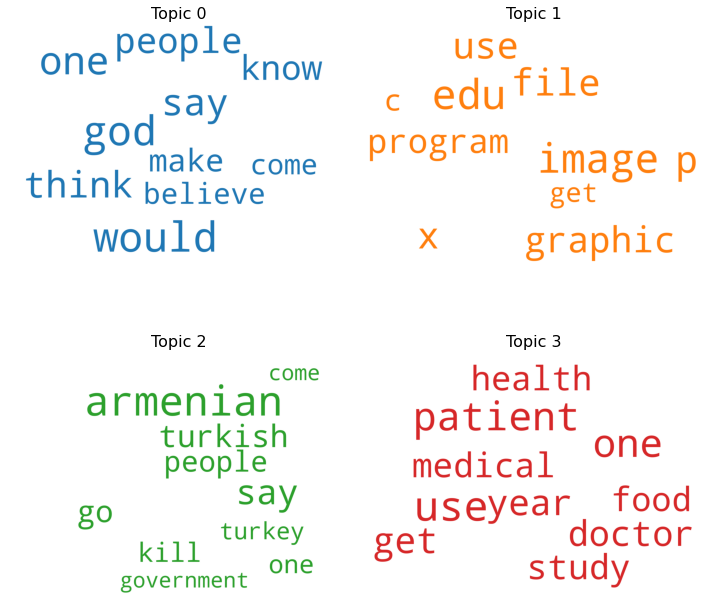

In [771]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=sw_nltk,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()    

## Part 3 -  Naive bayes

### 3.1 Prepering the text & target columns for classification

In [772]:
y = train_df['target']

In [773]:
y_test = test_df['target']

**We can see that the type of the targets is 'object', we need it to be an 'int'.
Let's fix it:**

In [774]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


train_data = [' '.join(ele) for ele in train_df['text']]
test_data = [' '.join(ele) for ele in test_df['text']]


y = train_df['target'].astype(str).astype(int)
y_test = test_df['target'].astype(str).astype(int)

In [775]:
X = train_data

In [776]:
X_test = test_data

### 3.2 BoW (CountVectorizer)

#### 3.2.2 Creating BoW by CountVectorizer

In [777]:
bag_of_words_creator = CountVectorizer()
bag_of_words = bag_of_words_creator.fit_transform(X)
bag_of_words

<2341x24085 sparse matrix of type '<class 'numpy.int64'>'
	with 182240 stored elements in Compressed Sparse Row format>

#### 3.2.3 transform testing data (using fitted vocabulary) into a document-term matrix

In [778]:
X_test_dtm = bag_of_words_creator.transform(X_test)
X_test_dtm

<1559x24085 sparse matrix of type '<class 'numpy.int64'>'
	with 127879 stored elements in Compressed Sparse Row format>

#### 3.2.4  Fitting, predictions & model accurecy

In [779]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB(alpha = 0.2)
nb.fit(bag_of_words, y)

MultinomialNB(alpha=0.2)

In [780]:
nb.n_features_in_

24085

In [781]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

##### Model accuracy:

In [782]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.8986529826812059

### 3.3 Naive Bias with TF-IDF

#### 3.3.1 Creating  TfidfVectorizer

In [895]:
tfidf_creator = TfidfVectorizer(min_df = 0.2)
X_train_tfidf = tfidf_creator.fit_transform(X)
X_train_tfidf

<2341x8 sparse matrix of type '<class 'numpy.float64'>'
	with 4683 stored elements in Compressed Sparse Row format>

In [896]:
X_test_tfidf = tfidf_creator.transform(X_test)
X_test_tfidf

<1559x8 sparse matrix of type '<class 'numpy.float64'>'
	with 3125 stored elements in Compressed Sparse Row format>

In [913]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer_train = TfidfTransformer(norm="max")
tf_idf_train_scores = tfidf_transformer_train.fit_transform(bag_of_words)
tf_idf_train_scores

<2341x24085 sparse matrix of type '<class 'numpy.float64'>'
	with 182240 stored elements in Compressed Sparse Row format>

In [909]:
tfidf_transformer_test = TfidfTransformer(norm="max")
tf_idf_test_scores = tfidf_transformer_test.fit_transform(X_test_dtm)
tf_idf_test_scores

<1559x24085 sparse matrix of type '<class 'numpy.float64'>'
	with 127879 stored elements in Compressed Sparse Row format>

#### 3.3.2 Fitting, predictions & model accurecy

In [910]:
nb = MultinomialNB()
nb.fit(tf_idf_train_scores, y)

MultinomialNB()

In [911]:
y_pred_class_TFIDF = nb.predict(tf_idf_test_scores)

##### Model accuracy:

In [912]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class_TFIDF)

0.881975625400898

 **The CountVectorizer is a little bit more accurate.**

#### 3.3.3 Confusion matrix 

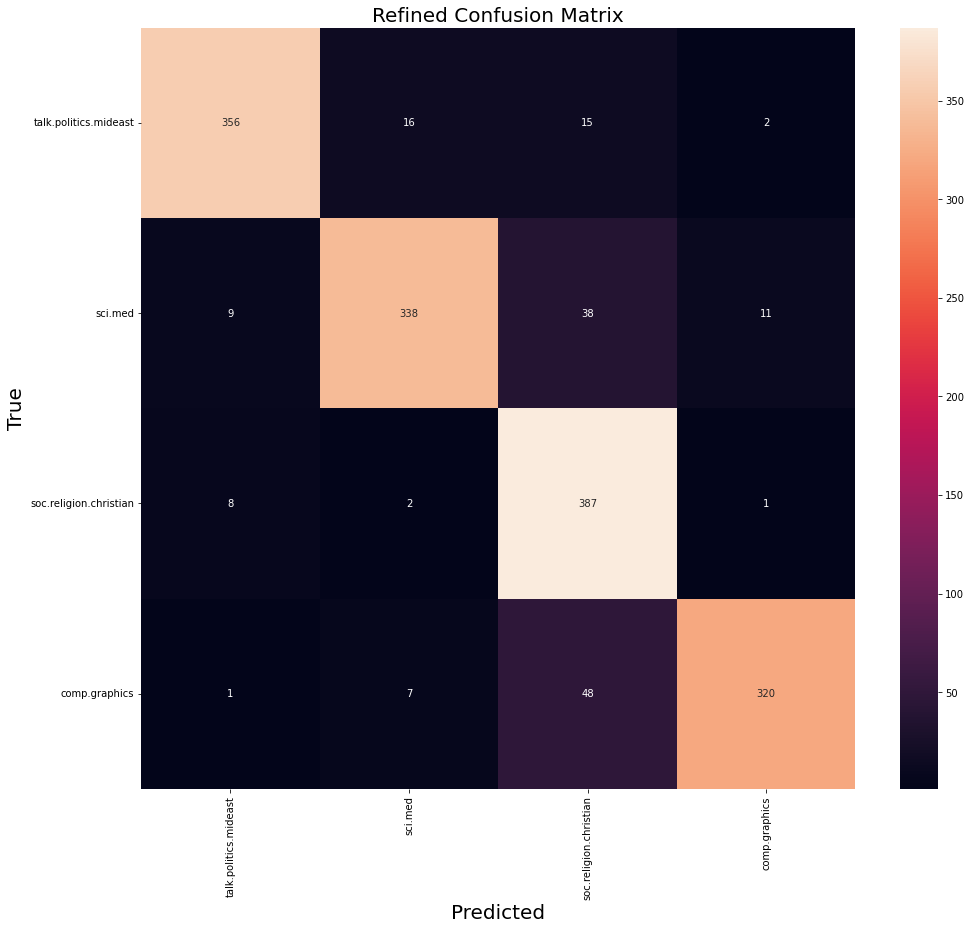

In [830]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_class)
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(cats, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(cats, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.show()

## Part 4 - LDA with sklearn

### 4.1 LDA with countvectorizer BOW

In [831]:
lda_bag_of_words_creator = LatentDirichletAllocation(learning_method='batch', n_components=4)
lda_bag_of_words = lda_bag_of_words_creator.fit_transform(bag_of_words)

In [832]:
print("~~~ Topics found by bag of words LDA ~~~")
for topic_id, topic in enumerate(lda_bag_of_words_creator.components_):
    message = "Topic #{}: ".format(topic_id + 1)
    message += " ".join([bag_of_words_creator.get_feature_names_out()[i] for i in topic.argsort()[:-7 :-1]])
    print(message)

~~~ Topics found by bag of words LDA ~~~
Topic #1: image file use graphic edu program
Topic #2: edu com use health center university
Topic #3: armenian people say one would god
Topic #4: say one know go would think


### Conclusion:

- 1) CountVectorizer gave a little bit more accurate result then TF-IDF.
- 2) The Topics are pretty clear from the most significnt words that we found using LDA with Gensim & CountVectorizer. 
   